# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [6]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [8]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train,y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [30]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.767507002801


In [37]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
#Parch_Age=titanic.Parch*titanic.Age
#feature_cols = ['Pclass', 'Parch', 'Age','Parch_Age']
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))


0.686098654709


In [31]:
# TASK 6: add Age as a feature and calculate testing accuracy, add test_size option
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
# Try to add an interaction term, but did not work: Parch_Age=titanic.Parch*titanic.Age
#feature_cols = ['Pclass', 'Parch', 'Age','Parch_Age']
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.694677871148


In [14]:
pd.get_dummies(titanic,columns=["Sex"]).head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [32]:
titanic_enc=pd.get_dummies(titanic,columns=["Sex"])
#titanic_enc=pd.get_dummies(titanic,columns=["Cabin"])
titanic_enc.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [36]:
feature_cols = ['Pclass', 'Parch', 'Age','Fare','Sex_male','Sex_female']
feature_cols 

['Pclass', 'Parch', 'Age', 'Fare', 'Sex_male', 'Sex_female']

In [37]:
# TASK 6: add Age as a feature and calculate testing accuracy, add test_size option
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Fare.fillna(titanic.Fare.mean(), inplace=True)
#Parch_Age=titanic.Parch*titanic.Age
#feature_cols = ['Pclass', 'Parch', 'Age','Parch_Age']
feature_cols = ['Pclass', 'Parch', 'Age','Fare','Sex_male','Sex_female']
#feature_cols_=feature_cols.join(one_hot_sex,one_hot_cabin)
X =titanic_enc[feature_cols]
# added test_size option
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.770308123249


In [17]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[112  16]
 [ 54  41]]


In [43]:
# TASK 6: add Age as a feature and calculate testing accuracy, add test_size option
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Fare.fillna(titanic.Fare.mean(), inplace=True)
Parch_Age=titanic.Parch*titanic.Age
#feature_cols = ['Pclass', 'Parch', 'Age','Parch_Age']
feature_cols = ['Pclass', 'Parch', 'Age','Fare','Sex_male','Sex_female']
#feature_cols_=feature_cols.join(Parch_Age)
X =titanic_enc[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.770308123249


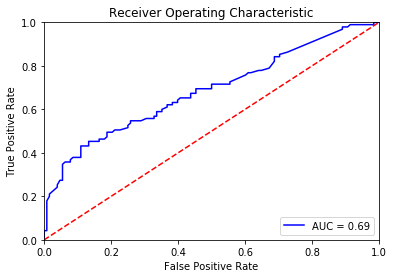

In [47]:
# TASK 8: Generate the ROC Curve
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import matplotlib.pyplot as plt

probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
titanic.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# TASK 9: What variables should we include in the model to improve it?
# TASK 9: add Sex,... as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Fare.fillna(titanic.Fare.mean(), inplace=True)
#titanic.Sex.fillna(titanic.Sex.mean(), inplace=True) use one-hot late?
feature_cols = ['Pclass', 'Parch', 'Age','Fare']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.677130044843


In [50]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print(gnb.fit(X_train,y_train))

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

GaussianNB(priors=None)
0.654708520179


In [58]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours

# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
# print accuracy_score(y_test, y_pred)


# from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))


0.694677871148
